In [1]:
import pandas as pd
from sklearn import preprocessing
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Loading dataset

In [2]:
dataset_path = "iris.data"
df = pd.read_csv(dataset_path, names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'target'])

In [3]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# Missing values

In [4]:
# counting number of NaN values per feature
print(df.isna().sum())

sepal_length    2
sepal_width     0
petal_length    2
petal_width     3
target          3
dtype: int64


In [5]:
# Drop NaN values using .dropna()
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)

In [6]:
# Just checking the result =) 
print(df.isna().sum())

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
target          0
dtype: int64


# Non-numerical data

In [7]:
# Label encoding for categorical features
le = preprocessing.LabelEncoder()
df['target'] = le.fit_transform(df['target'])

In [8]:
df

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


**Problem with using label encoding:**  
In our scenario, the target names do not have an order or rank. But, when label encoding is performed, the target names are ranked based on the alphabets.   
Due to this, there is a high chance that the model captures the relationship between target such as Iris-setosa < Iris-versicolor < Iris-virginica  
In conclusion, in prolems where there is no order or rank within categorical features it is better not to use label enconding. We can use One-Hot Encoding instead :D

**One-Hot Encoding:**  
It simply creates additional features based on the number of unique values in the categorical feature. Every unique value in the category will be added as a feature. In other words, One-Hot Encoding is the process of creating dummy variables.  
With one-hot, we convert each categorical value into a new categorical column and assign a binary value of 1 or 0 to those columns. Each integer value is represented as a binary vector. All the values are zero, and the index is marked with a 1. Once we assign numeric values, we create a binary vector that represents our numerical values.  
  
**Example:**  
In our Iris problem, 3 new features are added as the target contains 3 unique values.
![one-Hot Encoding example](assets/onehot-1.png)    
  
    
You can see that each classification label has its own column, so Setosa is \(1,0,0\), Virginica is \(0,1,0\), and Versicolor is \(0,0,1\).

# Normalization

In [10]:
target = df.pop('target')

mean_before = df.mean()
variance_before = df.var()

scaler = preprocessing.StandardScaler()
normalized_data = scaler.fit_transform(df)
normalized_data = pd.DataFrame(normalized_data, columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])

mean_after = normalized_data.mean()
variance_after = normalized_data.var()

In [11]:
print("mean before:\n")
print(mean_before.to_string())
print("\nmean after:\n")
print(mean_after.to_string())
print("\nVariances before:\n")
print(variance_before.to_string())
print("\nVariances after:\n")
print(variance_after.to_string())

mean before:

sepal_length    5.843333
sepal_width     3.054000
petal_length    3.758667
petal_width     1.198667

mean after:

sepal_length   -2.775558e-16
sepal_width    -5.140333e-16
petal_length    1.154632e-16
petal_width     9.251859e-16

Variances before:

sepal_length    0.685694
sepal_width     0.188004
petal_length    3.113179
petal_width     0.582414

Variances after:

sepal_length    1.006711
sepal_width     1.006711
petal_length    1.006711
petal_width     1.006711


# PCA

In [12]:
pca = PCA(n_components=2)
pca.fit(normalized_data)
pca_df = pd.DataFrame(pca.transform(normalized_data), columns=['Dim1', 'Dim2'])

In [13]:
pca_df

,Dim1,Dim2
0,-2.264542,0.505704
1,-2.086426,-0.655405
2,-2.367950,-0.318477
3,-2.304197,-0.575368
4,-2.388777,0.674767
...,...,...
145,1.870522,0.382822
146,1.558492,-0.905314
147,1.520845,0.266795
148,1.376391,1.016362


# Visualization

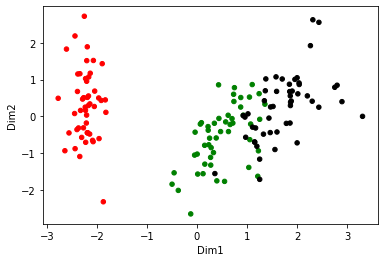

In [18]:
pca_df['color'] = target.map({0: 'Red', 1: 'Green', 2: 'Black'})
pca_df.plot.scatter(x="Dim1", y="Dim2", c="color")
plt.show()

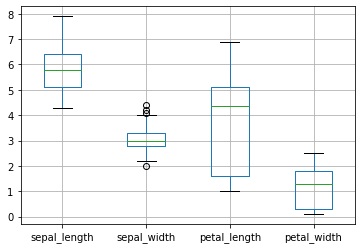

In [53]:
df.boxplot(column=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])
plt.show()

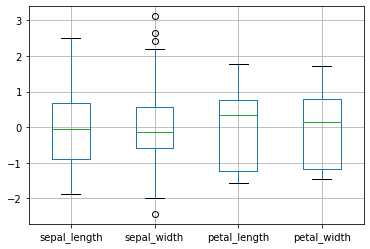

In [20]:
normalized_data.boxplot(column=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])
plt.show()